# Google Translator: An approach to Translational Equilibriums: 
Author: **Yuanlun (Alan) Xu**

In this essay, an implementation that makes use of the google translator api will be looked at, as well as how it effectively translates the scraped texts from English to the many other ones on the world. Since translation technique has been emerging as a necessity due to the globalizing need, this simple linguistic game that finds the Translational Equilibrium can perhaps provide some insights as to where translating services can go.

## Research

The implementation was mainly made to find and do a comparison of how different languages perform when it comes to finding equilibriums. Specifically, the number of steps that each language take when translating a certain text will be accounted for. The idea came from a Translation Lab project, namely [TranslationParty](https://translatedlabs.com/welcome), in which the service provide "parties" that does the following:
> What happens when you translate an English sentence into Japanese, and then again into English, as if it was an infinite loop? Well, give it a try! And don't forget to share the funniest results with your friends.

and the idea was to "win"/"showoff" with the most amount of steps on the equilibrium. Since there was only Japanese and English, the idea of using more languages has came to mind, and the [google_trans_new](https://github.com/lushan88a/google_trans_new) package can do just that with the help of Google Translate. This could potentially show the ambiguity of a certain language when it comes to translating accurately.

## Methodology

This section of the essay will demonstrate the implementation including what, where, and how data was collected. Since the program sprang off of [TranslationParty](https://www.translationparty.com), the "hot parties" is where all of the data, or in this case text, is coming from. The text is scraped by the `party_scraper.py` file where the usual `requests` and `BeautifulSoup` packages were used to find all divs of hot parties, their respective href links, and finally using this line of code 

In [ ]:
from party_scraper import *
parties = [party.getText() for party in soup.find(id="hotparties").find_all("a")]
scraper_to_text(parties, "grabbed_text.txt")
display(parties)

<details>
    <summary> Spoiler: data source may include inappropriate content</summary>

['Vote if you are on bored button rn',
    
 'Pajeet will not stop kuso in the street',
    
 'POV: your on bored button',
    
 'this is the best programm ever! who ever made this is cool',
    
 'Toodles mothafaka!',
    
 "rawr x3 nuzzles pounces on you uwu you're so warm couldn't help but notice your bulge from across the floor",
    
 'Hatsune Miku is the international symbol of world peace',
    
 "It's a beautiful day in the neighborhood, a beautiful day for a neighbor, 
    won't you be mine",
    
 'I taught I thaw a puthy cat? I deed! I deed see a puthy cat!',
    
'MMMMMMMMMMMMMMMMMMMMMMEEEEEEEEEEEEOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO[...]']
</details>

to store all the possible texts in a list of strings; a randomly chosen source text is promptly written into a text file.

In [ ]:
with open(output, "w") as file:
    file.write(random.choice(scraped_text))

With the data in hand, it didn't take long to be able to find the translational equilibrium. The text file was first read and converted into a list of strings stored to be better processed; the equilibrium is found recursively with the help of a google_trans_new function `Translator().translate()` that was utilized in the `translate_to` function and as well as all the subsequent functions that call `translate_to`. The equilibriums is returned as a tuple, with the translational equilibrium text and the amount of steps it has taken google translate to do so. The maximum equilibrium is found then with `find_max_equilibrium()`, where the first highest steps is taken.

In [54]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_trans_new import LANGUAGES
import translate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# global equilibriums
# SOURCE = "grabbed_text.txt"
# text = translate.file_to_list(SOURCE)
# equilibriums = {}
# for index in range(64):
#     lang = list(LAaNGUAGES.keys())[index]
#     equilibrium_pair = translate.find_equilibrium(text, lang)
#     equilibriums[lang] = equilibrium_pair[1]
#     equilibrium_text = translate.translate_to(equilibrium_pair[0], lang)
#     with open (f"output_{SOURCE}", "a") as file:
#         for line in equilibrium_text:
#             file.write(f"{lang}: {line}\n")
# print(equilibriums)
# print(translate.find_max_equilibrium(equilibriums))

{'af': 1, 'sq': 1, 'am': 10, 'ar': 1, 'hy': 1, 'az': 1, 'eu': 3, 'be': 1, 'bn': 2, 'bs': 1, 'bg': 4, 'ca': 1, 'ceb': 2, 'ny': 4, 'zh-cn': 3, 'zh-tw': 3, 'co': 1, 'hr': 1, 'cs': 3, 'da': 1, 'nl': 1, 'en': 1, 'eo': 4, 'et': 1, 'tl': 2, 'fi': 5, 'fr': 1, 'fy': 1, 'gl': 1, 'ka': 2, 'de': 1, 'el': 1, 'gu': 7, 'ht': 1, 'ha': 4, 'haw': 6, 'iw': 1, 'he': 1, 'hi': 2, 'hmn': 7, 'hu': 1, 'is': 1, 'ig': 8, 'id': 1, 'ga': 1, 'it': 1, 'ja': 1, 'jw': 3, 'kn': 3, 'kk': 2, 'km': 1, 'ko': 10, 'ku': 1, 'ky': 6, 'lo': 1, 'la': 2, 'lv': 1, 'lt': 1, 'lb': 7, 'mk': 1, 'mg': 2, 'ms': 2, 'ml': 4, 'mt': 1}
('am', 10)


Lastly, after the data has been taken into the process of finding its translational equilibrium, a scatterplot that contains all the languages and their respective steps taken to reach equilibrium, a wordcloud that represents the most common words in all translations, and a chart including the top 3 languages that takes the most amount of steps to reach their translational equilibriums are shown. The implementation is collectively shown with the results section.

## Results

To begin with, a general scatter plot is created as follows using the `matplotlib` package, with the languages on the x axis and the steps to equilibrium on the y axis for clearer interpretation. As shown in the plot, both "am" and "ko" have the highest steps to reach translational equilibriums with this particular source text (shown below).

In [39]:
x = np.array(list(equilibriums.keys()))
y = np.array(list(equilibriums.values()))
# set plot size
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams["figure.dpi"] = 1080
plt.scatter(x,y)
plt.title('Steps to a Translational Equilibrium', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Steps to Equilibrium', fontsize=12)
plt.show()

In this particular case, the following line of text was randomly chosen from the datasource, and a wordcloud that uses the `wordcloud` python package was used to generate a figure to represent the english text as it reaches the equilibrium. This could be useful as it shows most of the nouns and some simple verbs are not ambiguous, meaning that they will be translated correctly. However, there are definitely ambiguity in looking at the new words that has came into the collection.

In [52]:
with open (SOURCE, "r") as file:
    for line in file.readlines():
        print(line.strip())

Pajeet will not stop kuso in the street


output_grabbed_text.txt


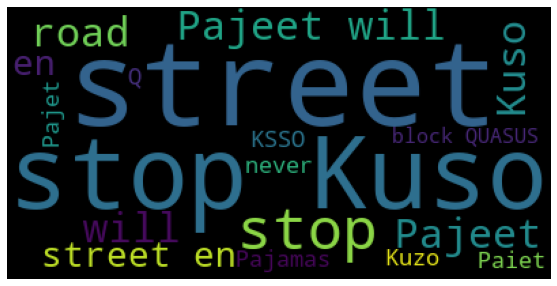

In [47]:
RESULT = "output_grabbed_text.txt"
text = translate.file_to_list(RESULT)
translated = translate.translate_to(text, "en")
word_cloud = WordCloud(repeat=True, max_words=100).generate("".join(translated))
plt.rcParams['figure.figsize'] = [20, 5]
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [63]:
temp = dict(equilibriums)
max_equilibriums = []
for _ in range(3):
    current_max = translate.find_max_equilibrium(temp)
    display(current_max)
    del temp[current_max[0]]

('am', 10)

('ko', 10)

('ig', 8)